# Proceso de Wiener
## Nombre: Daniel Pereira Sandino


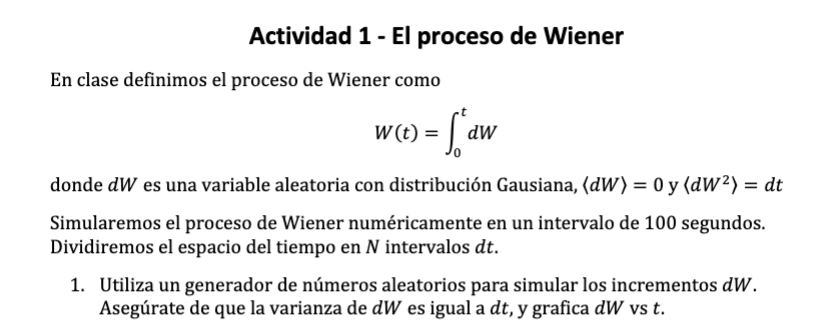

Text(0.5, 1.0, 'dW vs tiempo')

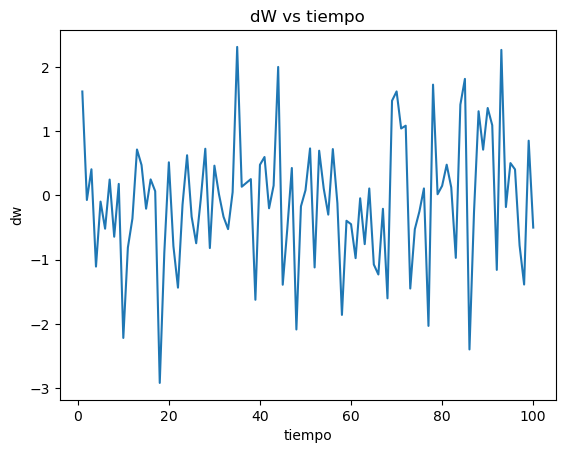

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

dt=np.linspace(1,100, num=100)
mu=0
sigma=np.sqrt(dt[1]-dt[0])

dw=np.random.normal(mu, sigma, 100)

plt.plot(dt, dw)
plt.xlabel('tiempo')
plt.ylabel('dw')
plt.title('dW vs tiempo')

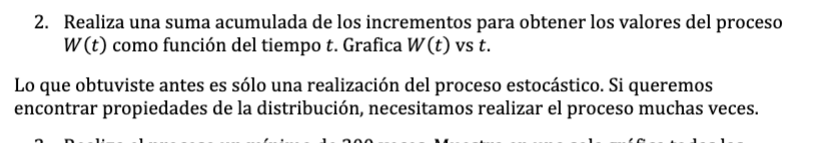

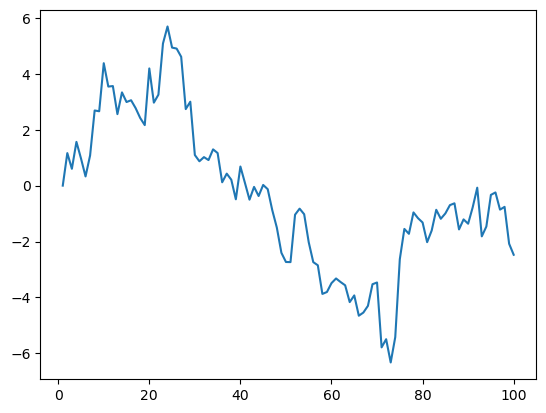

In [267]:
w=np.cumsum(dw)
w[0]=0
plt.plot(dt,w)

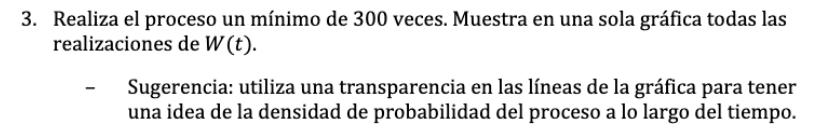

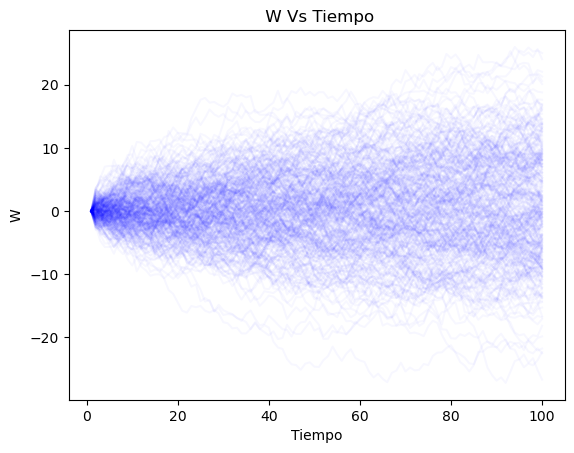

In [269]:
W=np.zeros((300,100))
for i in range (300):
    dw=np.random.normal(mu, sigma, 100)
    w=np.cumsum(dw)
    w[0]=0
    W[i:]=w
    plt.plot(dt, w, alpha=0.03,color='blue')
    plt.xlabel("Tiempo")
    plt.ylabel("W")
    plt.title(" W Vs Tiempo")



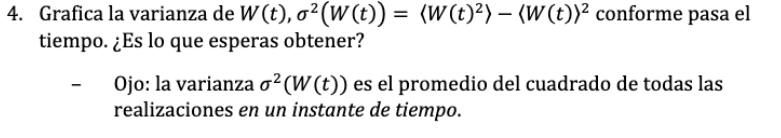

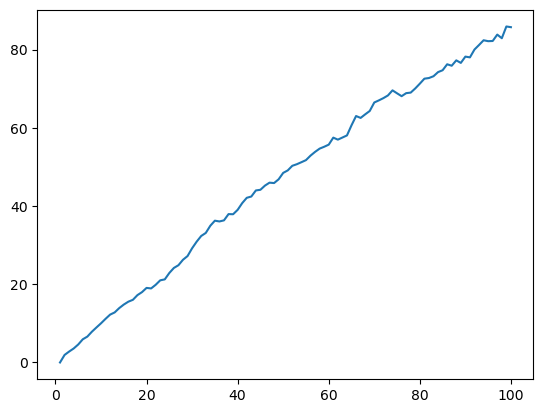

In [270]:
var=np.zeros(100)
for i in range (len(dt)):
    var[i]=np.mean(W[:,i]**2)-np.mean(W[:,i])**2
    
plt.plot(dt, var)

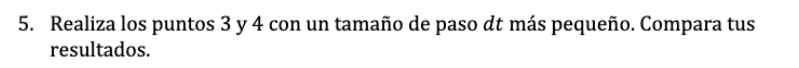

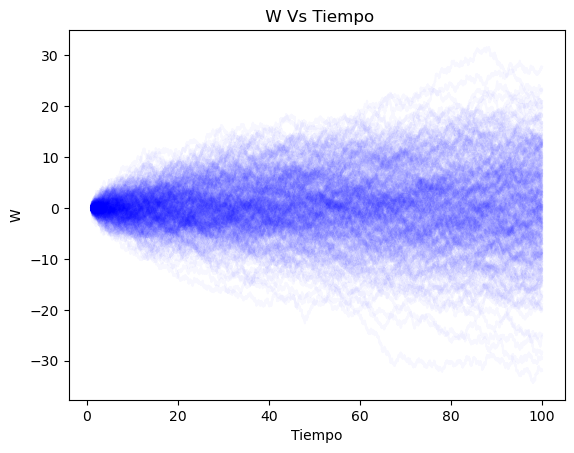

In [312]:
dt2=np.linspace(1,100, num=10000)
W2=np.zeros((300,10000))
sigma2=np.sqrt(dt2[1]-dt2[0])
for i in range (300):
    dw2=np.random.normal(mu, sigma2, 10000)
    w2=np.cumsum(dw2)
    W2[i:]=w2
    plt.plot(dt2, w2, alpha=0.03,color='blue')
    plt.xlabel("Tiempo")
    plt.ylabel("W")
    plt.title(" W Vs Tiempo")
    

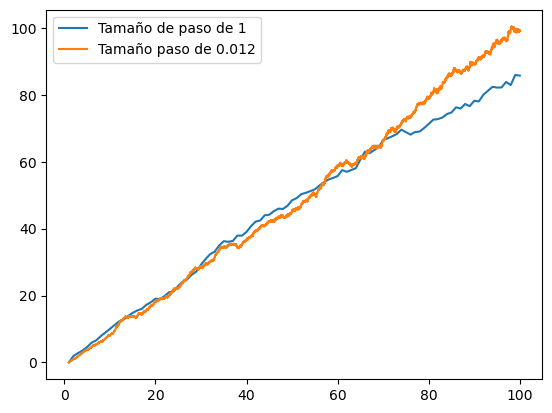

In [313]:
var2=np.zeros(10000)
for j in range (len(dt2)):
    var2[j]=np.mean(W2[:,j]**2)-np.mean(W2[:,j])**2
    
plt.plot(dt, var, label="Tamaño de paso de 1")
plt.plot(dt2, var2, label="Tamaño paso de 0.012")
plt.legend()

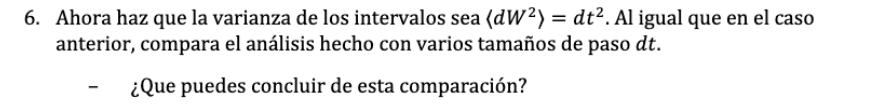

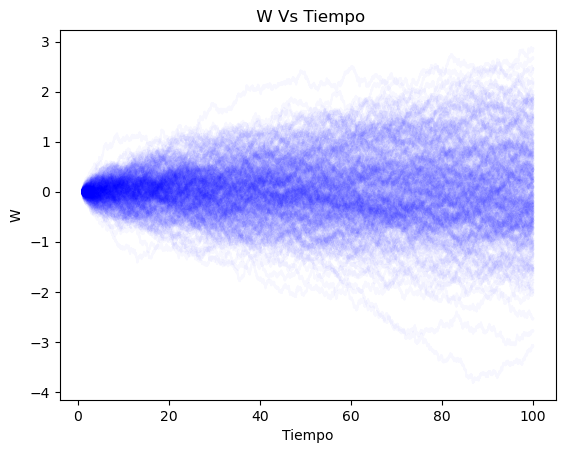

In [399]:
dt2=np.linspace(1,100, num=10000)
W2=np.zeros((300,10000))
sigma2=dt2[1]-dt2[0]
for i in range (300):
    dw2=np.random.normal(mu, sigma2, 10000)
    w2=np.cumsum(dw2)
    W2[i:]=w2
    plt.plot(dt2, w2, alpha=0.03,color='blue')
    plt.xlabel("Tiempo")
    plt.ylabel("W")
    plt.title(" W Vs Tiempo") 

Text(0.5, 0, 'tiempo')

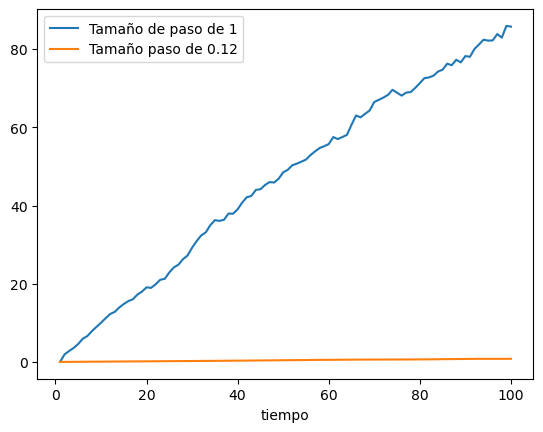

In [315]:
var2=np.zeros(10000)
for j in range (len(dt2)):
    var2[j]=np.mean(W2[:,j]**2)-np.mean(W2[:,j])**2
    
plt.plot(dt, var, label="Tamaño de paso de 1")
plt.plot(dt2, var2, label="Tamaño paso de 0.12")
plt.legend()
plt.xlabel("tiempo")


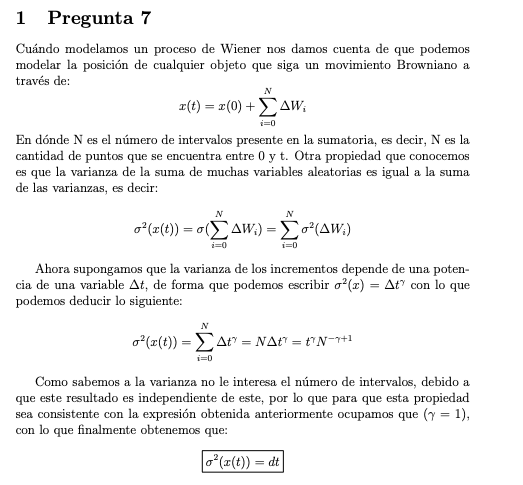

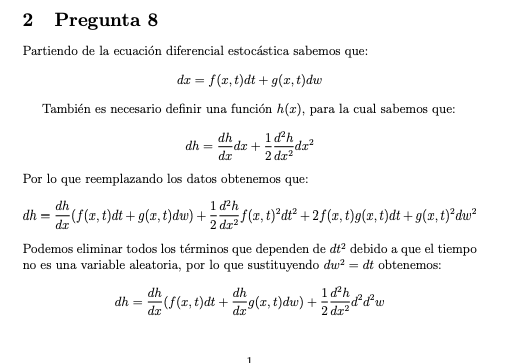

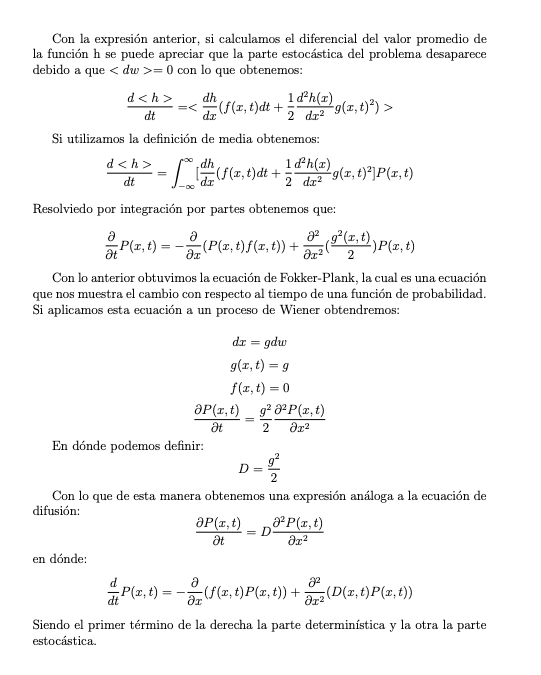

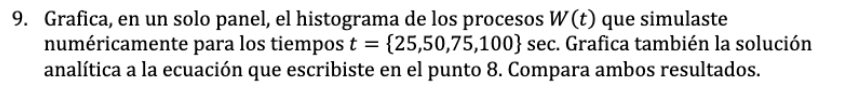

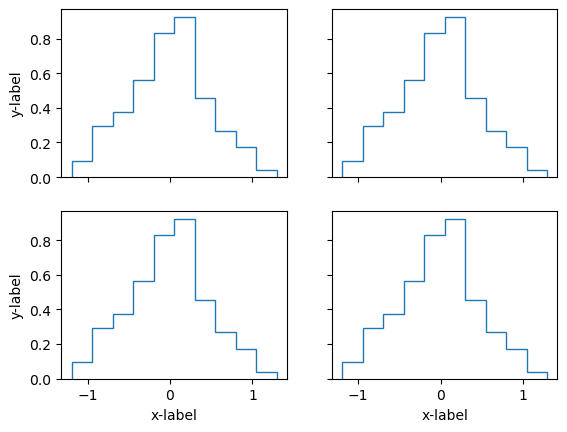

In [398]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(W2[:,2500], density=True, histtype='step')

axs[0, 1].hist(W2[:,2500], density=True, histtype='step')

axs[1, 0].hist(W2[:,2500], density=True, histtype='step')

axs[1, 1].hist(W2[:,2500], density=True, histtype='step')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()




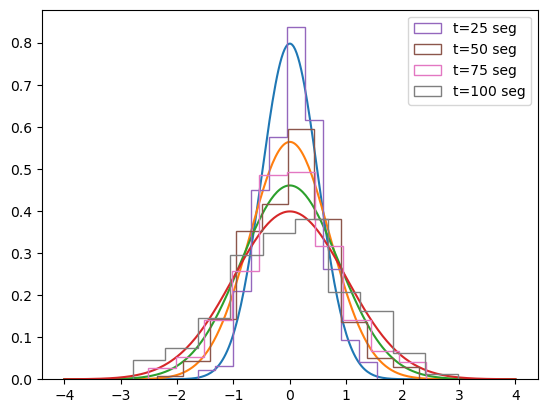

In [377]:
from numpy import sqrt, pi, exp
def analitica_fokker(tiempo):
    x = np.linspace(-4,4,num=300)
    difus_list=[]
    for i in range(0,len(W2)):
        difus_list.append((1/sqrt(2*pi*tiempo))*exp(-((x[i])**2)/(2*tiempo)))
    plt.plot(x,difus_list)


analitica_fokker(0.25)
analitica_fokker(0.50)
analitica_fokker(0.75)
analitica_fokker(1)
plt.hist(W2[:,2500], density=True, histtype='step',label="t=25 seg")
plt.hist(W2[:,5000], density=True, histtype='step',label="t=50 seg")
plt.hist(W2[:,7500], density=True, histtype='step',label="t=75 seg")
plt.hist(W2[:,9999], density=True, histtype='step',label="t=100 seg")
plt.legend()